# Importing essential libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [3]:
dataset=pd.read_csv("housing.csv")
dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# Dataset analysis

In [4]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
print(dataset.shape)
dataset.info()

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
dataset.describe(include="O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [7]:
dataset.total_bedrooms.isna().value_counts()

False    20433
True       207
Name: total_bedrooms, dtype: int64

207 NaN values present in  total_bedrooms column 

In [8]:
dataset.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
dataset.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Removing rows from dataset with null values

In [10]:
dataset.dropna(inplace=True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


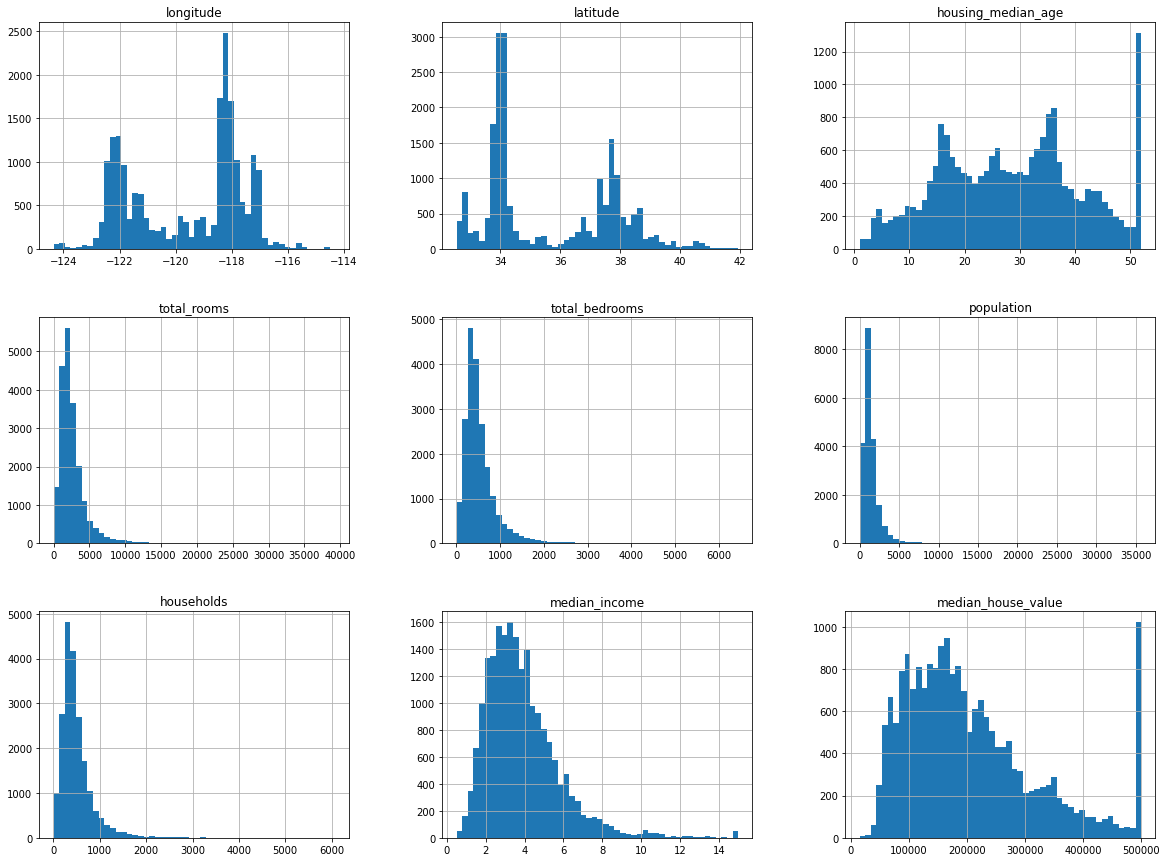

In [12]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

# Creating additional features 

In [13]:
dataset['rooms_per_household']=dataset.total_rooms/dataset.households

In [14]:
dataset.rooms_per_household

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: rooms_per_household, Length: 20433, dtype: float64

In [15]:
dataset.rooms_per_household.nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [16]:
dataset.rooms_per_household.nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

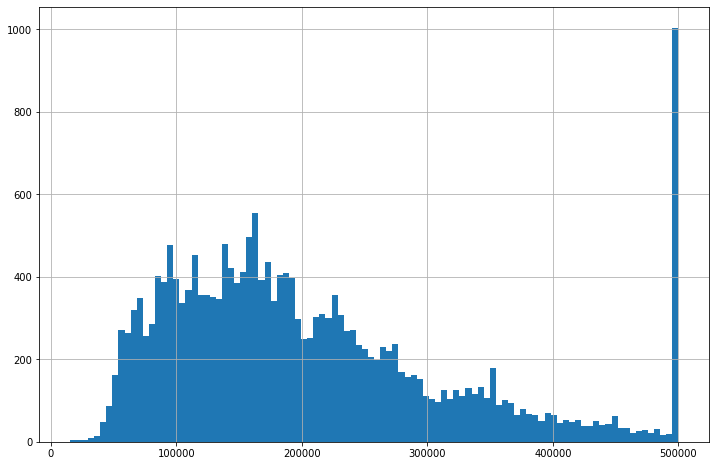

In [17]:
dataset.median_house_value.hist(bins = 100, figsize = (12, 8))
plt.show()

# Checking Corelation of median_house_value with other features

In [18]:
dataset.corr().median_house_value.sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
population            -0.025300
longitude             -0.045398
latitude              -0.144638
Name: median_house_value, dtype: float64

It shows that median_income has highest relation with median_house_value

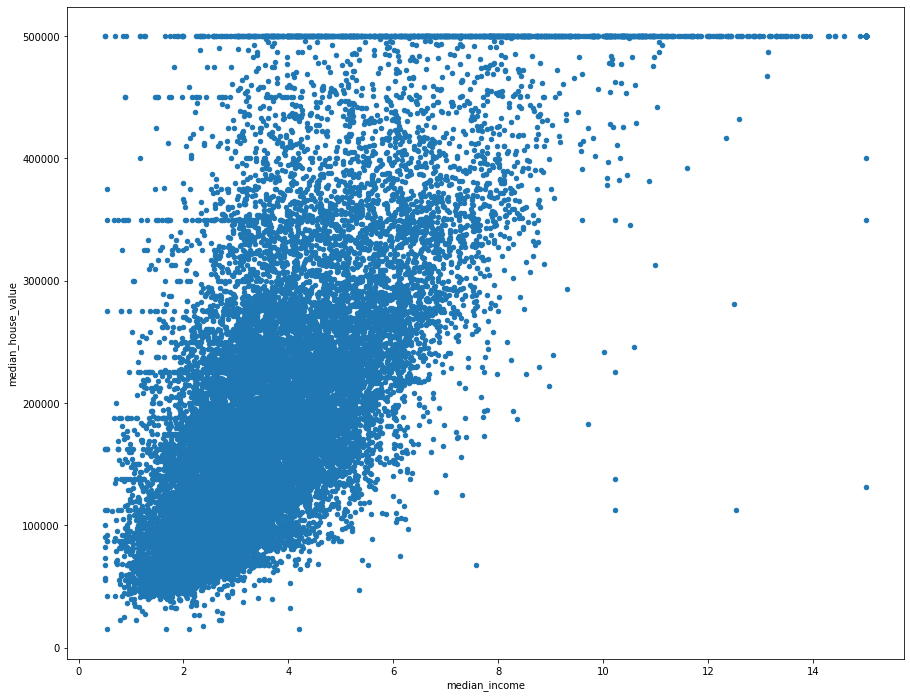

In [19]:
dataset.plot(kind='scatter' , y='median_house_value', x='median_income', figsize=(15,12))
plt.show()

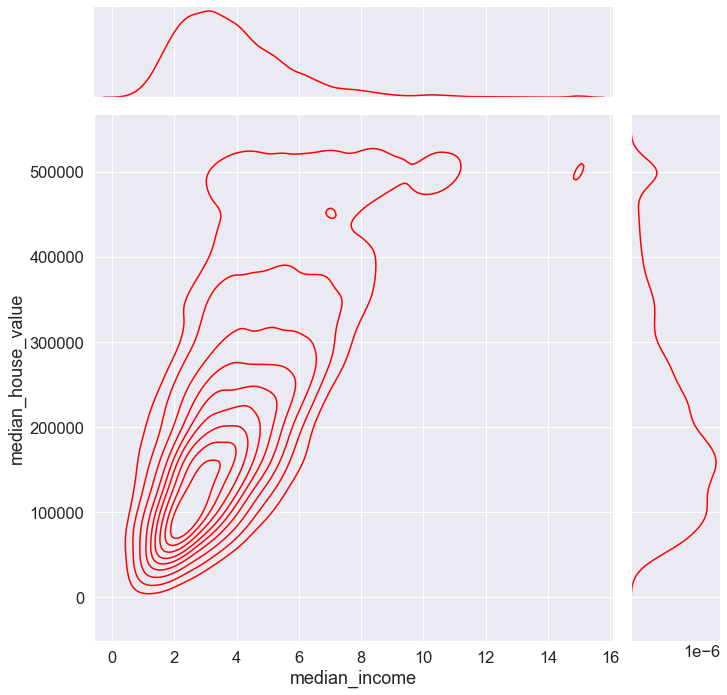

In [20]:
sns.set(font_scale=1.5)
sns.jointplot(data = dataset, x = "median_income", y = "median_house_value", kind = "kde", height = 10,color='red')
plt.show()

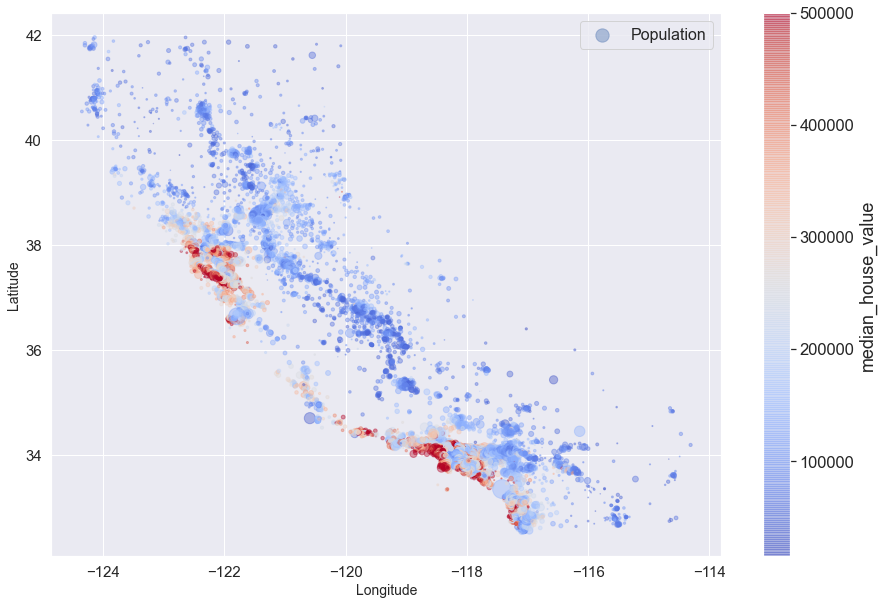

In [21]:
dataset.plot(kind="scatter", x="longitude", y="latitude",
                       s=dataset.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap= "coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 15, sharex = False)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

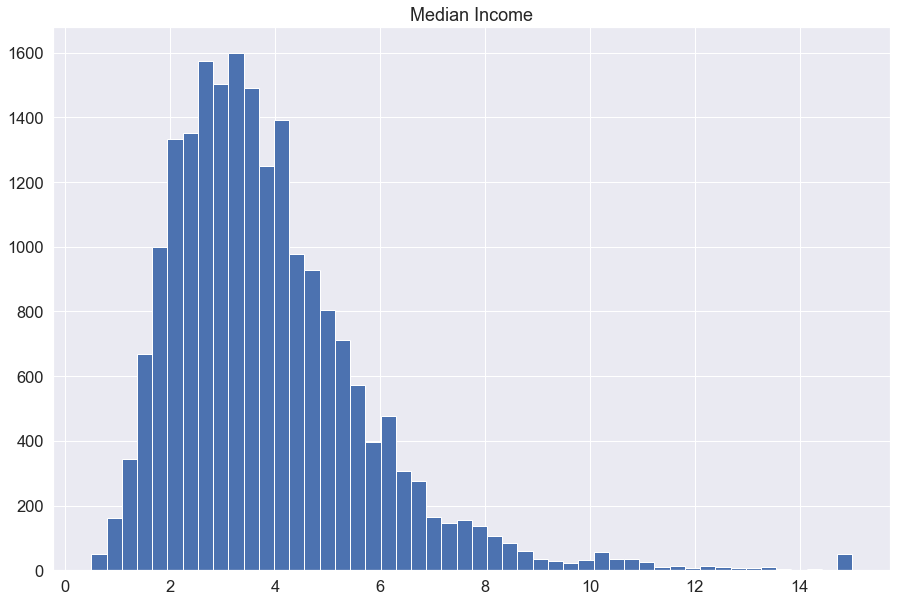

In [22]:
dataset.median_income.hist(bins=50, figsize=(15,10))
plt.title("Median Income")
plt.show()

In [23]:
pd.qcut(dataset.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.744, 7.3]
3          (4.744, 7.3]
4        (3.536, 4.744]
              ...      
20635    (0.499, 2.564]
20636    (0.499, 2.564]
20637    (0.499, 2.564]
20638    (0.499, 2.564]
20639    (0.499, 2.564]
Name: median_income, Length: 20433, dtype: category
Categories (5, interval[float64]): [(0.499, 2.564] < (2.564, 3.536] < (3.536, 4.744] < (4.744, 7.3] < (7.3, 15.0]]

In [24]:
dataset["income_cat"] = pd.qcut(dataset.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1],
                           labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"])

In [25]:
dataset.income_cat.value_counts(normalize = True)

Above_Average    0.250037
Low              0.250037
Below_Average    0.249988
High             0.199922
Very High        0.050017
Name: income_cat, dtype: float64

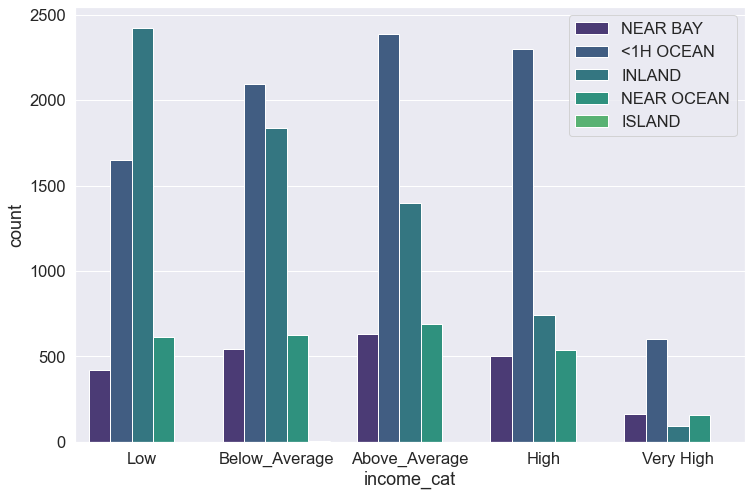

In [26]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = dataset, x = "income_cat", hue = "ocean_proximity")
plt.legend(loc = 1)
plt.show()

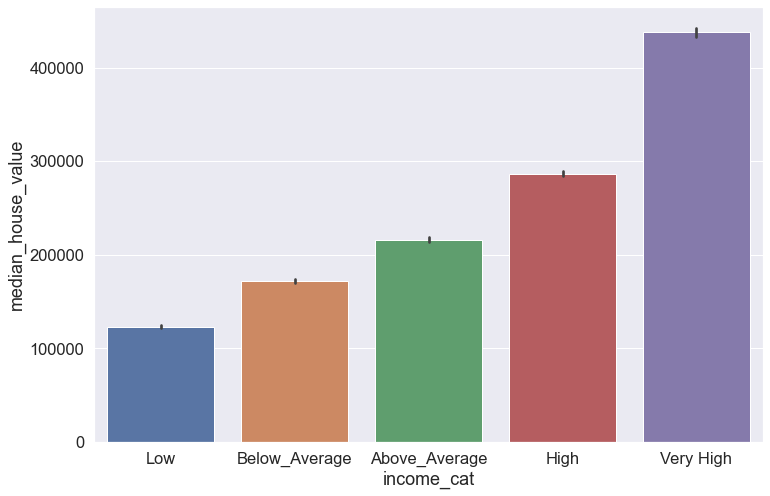

In [27]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = dataset, x = "income_cat", y = "median_house_value", dodge = True)
plt.show()

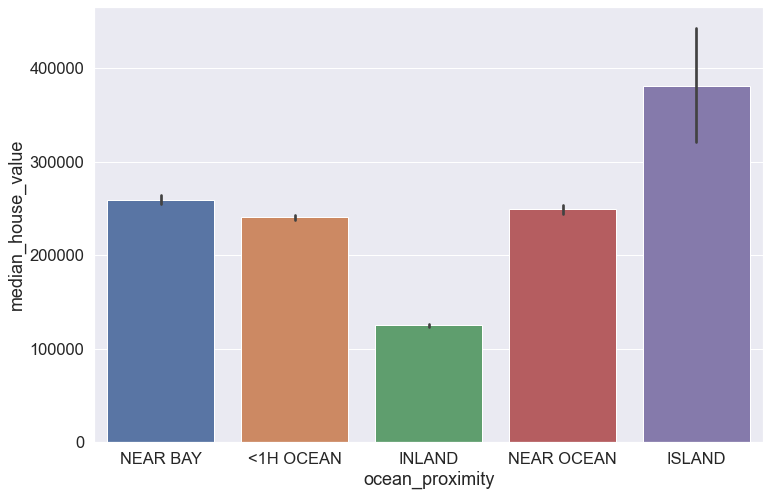

In [28]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = dataset, x = "ocean_proximity", y = "median_house_value", dodge = True)
plt.show()

In [29]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,Low


In [31]:
dataset.drop(columns=["income_cat"], inplace=True)
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513


In [33]:
y=dataset.median_house_value.copy()
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [35]:
x = dataset.drop(columns = ["median_house_value"])
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [40]:
x

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.26000000e+02, 8.32520000e+00, 6.98412698e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.13800000e+03, 8.30140000e+00, 6.23813708e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.77000000e+02, 7.25740000e+00, 8.28813559e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.33000000e+02, 1.70000000e+00, 5.20554273e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.49000000e+02, 1.86720000e+00, 5.32951289e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        5.30000000e+02, 2.38860000e+00, 5.25471698e+00]])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [48]:
X_train

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.59000000e+02, 3.04170000e+00, 4.69063181e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.11000000e+02, 3.10000000e+00, 4.97749196e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.39500000e+03, 4.95040000e+00, 5.63010753e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.45000000e+02, 7.15760000e+00, 1.03448276e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.03000000e+02, 3.04320000e+00, 5.30182421e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.90000000e+02, 2.30360000e+00, 4.62051282e+00]])

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 5:] = sc.fit_transform(X_train[:, 5:])
X_test[:, 5:] = sc.transform(X_test[:, 5:])

In [69]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,1.0,0.0,-1.339058,1.045686,1.539461,-0.221918,-0.053711,0.193252,-0.110006,-0.435947,-0.316503
1,0.0,1.0,0.0,0.0,0.0,-0.080127,0.529929,0.109650,-0.495197,-0.605031,-0.473210,-0.491997,-0.405079,-0.190027
2,0.0,0.0,0.0,1.0,0.0,-1.309084,1.172281,-1.876197,2.353232,2.125760,2.534522,2.305828,0.574640,0.097711
3,1.0,0.0,0.0,0.0,0.0,0.709202,-0.736022,-0.049217,0.546878,0.896435,0.938477,0.961117,-0.190646,-0.439900
4,1.0,0.0,0.0,0.0,0.0,0.569321,-0.740710,1.857196,-0.429700,-0.586262,-0.610830,-0.507483,1.507077,0.062753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,1.0,0.0,0.0,0.0,0.0,0.844088,-0.862617,0.268518,-0.524106,-0.574532,-0.436857,-0.533293,0.675979,-0.166652
16342,0.0,0.0,0.0,0.0,1.0,-0.429830,-0.435945,-0.208085,-0.131577,-0.354004,-0.011015,-0.290677,0.002608,0.282330
16343,1.0,0.0,0.0,0.0,0.0,0.559330,-0.726644,1.857196,-0.516879,-0.853711,-0.907708,-0.920446,1.743271,2.176422
16344,0.0,1.0,0.0,0.0,0.0,1.298702,-0.792286,0.030217,0.249659,0.216083,0.250377,0.261661,-0.435152,-0.047029


In [76]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,0.694215,-0.698512,0.745122,0.178290,-0.124092,-0.261154,-0.094520,2.036594,0.496889
1,1.0,0.0,0.0,0.0,0.0,0.689219,-0.698512,0.745122,-0.369624,-0.562802,-0.553705,-0.528131,0.757728,0.326114
2,1.0,0.0,0.0,0.0,0.0,1.158820,-1.139250,-1.479027,-0.268443,-0.156937,-0.113148,-0.079034,-0.565983,-0.465610
3,0.0,0.0,0.0,0.0,1.0,0.169660,-0.675068,-1.002424,1.198232,0.633679,0.048707,0.426846,1.369788,1.116812
4,0.0,1.0,0.0,0.0,0.0,-0.679618,2.030314,-1.081858,-0.441896,-0.443154,-0.533797,-0.479092,-0.481375,-0.060111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,0.0,1.0,0.0,0.0,0.0,0.744173,-0.689135,1.062857,0.382007,0.293503,0.242587,0.305538,0.360578,0.097236
4083,1.0,0.0,0.0,0.0,0.0,-1.139228,0.454909,-0.605255,-0.118930,0.377960,-0.146038,0.406198,-0.703061,-0.791607
4084,0.0,0.0,0.0,0.0,1.0,-2.068439,1.992804,1.062857,-0.508748,-0.368081,-0.672283,-0.512645,-1.254761,-0.175737
4085,0.0,0.0,0.0,0.0,1.0,-1.304088,0.848761,1.221725,-0.183975,-0.452538,-0.419547,-0.401661,2.318268,0.465953


In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
forest_reg = RandomForestRegressor(random_state = 42, n_estimators = 500,
                                   max_features= "sqrt", max_depth= 75, min_samples_split=2)

In [53]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [54]:
forest_reg.score(X_train, y_train)

0.974466749478297

In [55]:
pred = forest_reg.predict(X_test)
pred

array([465771.462, 313706.026, 154666.6  , ...,  83591.6  , 476491.148,
       247689.832])

In [56]:
comp = pd.DataFrame(data = {"True_V": y_test, "Pred":pred})
comp

,True_V,Pred
6715,360900.0,465771.462
4121,291500.0,313706.026
15433,131300.0,154666.600
20272,500001.0,387187.372
11843,118800.0,102216.800
...,...,...
6679,242400.0,274337.200
9862,218000.0,194988.802
9456,69800.0,83591.600
17145,500001.0,476491.148


In [108]:
from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

48881.14481107845

In [109]:
abs_error = comp.True_V.sub(comp.Pred).abs()
abs_error

6715     104871.462
4121      22206.026
15433     23366.600
20272    112813.628
11843     16583.200
            ...    
6679      31937.200
9862      23011.198
9456      13791.600
17145     23509.852
3968      27489.832
Length: 4087, dtype: float64

In [110]:
mean_abs_error = abs_error.mean()
mean_abs_error

32620.085715683876

In [111]:
forest_reg.feature_importances_

array([2.42955108e-02, 1.28053335e-01, 1.96037626e-04, 7.73897999e-03,
       1.11578317e-02, 1.13863468e-01, 1.01707901e-01, 4.78417832e-02,
       4.19077162e-02, 3.48451842e-02, 4.98573954e-02, 3.40068651e-02,
       3.07709479e-01, 9.68185123e-02])

In [113]:
feature_imp = pd.Series(data = forest_reg.feature_importances_,
                        index = pd.DataFrame(X_train).columns).sort_values(ascending = False)

In [115]:
feature_imp

12    0.307709
1     0.128053
5     0.113863
6     0.101708
13    0.096819
10    0.049857
7     0.047842
8     0.041908
9     0.034845
11    0.034007
0     0.024296
4     0.011158
3     0.007739
2     0.000196
dtype: float64

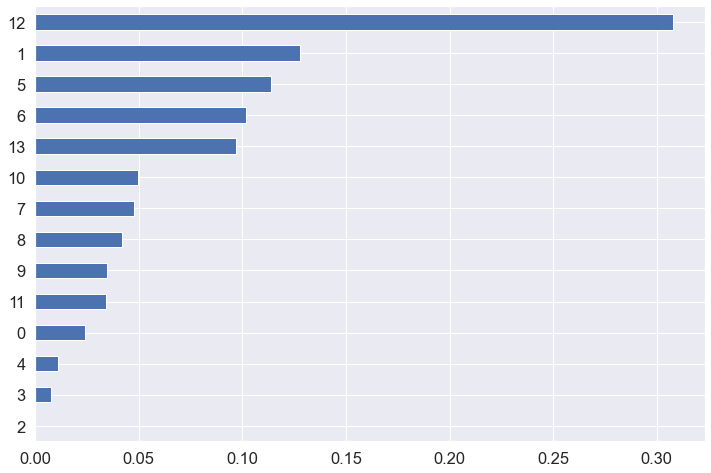

In [114]:
feature_imp.sort_values().plot.barh(figsize = (12, 8))
plt.show()